In [1]:
import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np
import matplotlib.pylab as plt
from sklearn.metrics.pairwise import cosine_similarity
tfd = tfp.distributions
tfb = tfp.bijectors
ed = tfp.edward2

/home/folzd/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def probabilistic_pca(n_features, n_sources, n_observations): # (unmodeled) data
    w = ed.Normal(loc=tf.zeros([n_features, n_sources]),
                scale=2.0 * tf.ones([n_features, n_sources]),
                name="w")  # parameter
    z = ed.Normal(loc=tf.zeros([n_sources, n_observations]),
                scale=tf.ones([n_sources, n_observations]), 
                name="z")  # parameter
    sigma = ed.Gamma(concentration=.1,rate=10.,name='sigma')
    x = ed.Normal(loc=tf.matmul(w/tf.linalg.norm(w, axis=1, keepdims=True), z),
                scale=sigma * tf.ones([n_features, n_observations]),
                name="x")  # (modeled) data
    return x, (w, z, sigma)


n_features = 1500
n_sources = 1
n_observations = 5000

log_joint = ed.make_log_joint_fn(probabilistic_pca)




model = probabilistic_pca(n_features=n_features,
                          n_sources=n_sources,
                          n_observations=n_observations)

with tf.Session() as sess:
    x_train, (actual_w, actual_z, actual_sigma) = sess.run(model)


tf.reset_default_graph()

w = tf.Variable(np.random.randn(n_features, n_sources), dtype=tf.float32)
z = tf.Variable(np.random.randn(n_sources, n_observations), dtype=tf.float32)
sigma = tf.nn.softplus(tf.Variable(-10.*np.abs(np.random.randn()), dtype=tf.float32))


def target(w, z, sigma):
  """Unnormalized target density as a function of the parameters."""
  return log_joint(n_features=n_features,
                   n_sources=n_sources,
                   n_observations=n_observations,
                   sigma=sigma,
                   w=w, z=z, x=x_train)


energy = -target(w, z, sigma)

optimizer = tf.train.AdamOptimizer(learning_rate=0.005)
train = optimizer.minimize(energy)


[[ 1.451203  ]
 [-0.46471536]
 [-0.5407363 ]
 ...
 [ 0.400896  ]
 [ 0.29096413]
 [-0.45853955]] [[ 0.26547718 -1.2052481   2.279586   ... -0.37738648 -0.47745356
  -0.05831129]] 0.0010656399 6627979000000.0
[[ 1.4575632 ]
 [-0.47161028]
 [-0.5407363 ]
 ...
 [ 0.41598573]
 [ 0.27479145]
 [-0.44337374]] [[ 0.24059865 -1.1803027   2.2546337  ... -0.3524827  -0.4525374
  -0.033744  ]] 0.0010925521 6181837000000.0
[[ 1.4751513 ]
 [-0.48497993]
 [-0.5407363 ]
 ...
 [ 0.41868284]
 [ 0.2608286 ]
 [-0.43264   ]] [[ 0.21618873 -1.1555626   2.2298582  ... -0.32794347 -0.42793748
  -0.01111249]] 0.0011198209 5771838400000.0
[[ 1.4901656 ]
 [-0.49105802]
 [-0.53610396]
 ...
 [ 0.42500037]
 [ 0.24569884]
 [-0.4234566 ]] [[ 0.19260901 -1.1311704   2.205383   ... -0.3040426  -0.4038867
   0.00750815]] 0.0011475652 5393449000000.0
[[ 1.5053551 ]
 [-0.5037732 ]
 [-0.53921026]
 ...
 [ 0.42444256]
 [ 0.227269  ]
 [-0.41383022]] [[ 0.17016253 -1.1072625   2.1813157  ... -0.28098395 -0.38056305
   0.0205522

[[ 1.6445214 ]
 [-0.5972886 ]
 [-0.65291554]
 ...
 [ 0.40974993]
 [ 0.21771362]
 [-0.3518691 ]] [[-7.0932503e-03 -5.9941536e-01  1.6128300e+00 ... -1.1689060e-03
  -4.0500425e-02  1.5414267e-02]] 0.00203914 1199588800000.0
[[ 1.6460881 ]
 [-0.59765875]
 [-0.65082127]
 ...
 [ 0.40988588]
 [ 0.21589832]
 [-0.35306707]] [[-7.1960525e-03 -5.9134442e-01  1.6022960e+00 ...  8.5751250e-05
  -3.7945755e-02  1.5415658e-02]] 0.002060316 1169601700000.0
[[ 1.6475167 ]
 [-0.5987928 ]
 [-0.6492513 ]
 ...
 [ 0.409096  ]
 [ 0.2158909 ]
 [-0.35389355]] [[-7.2857416e-03 -5.8345968e-01  1.5919342e+00 ...  1.2521739e-03
  -3.5525780e-02  1.5416721e-02]] 0.0020813723 1140879900000.0
[[ 1.6491038 ]
 [-0.5997804 ]
 [-0.648638  ]
 ...
 [ 0.4083211 ]
 [ 0.21602492]
 [-0.35300204]] [[-0.00736412 -0.57575494  1.5817399  ...  0.00233727 -0.03323236
   0.01541736]] 0.0021023094 1113349000000.0
[[ 1.6511817 ]
 [-0.601245  ]
 [-0.6484234 ]
 ...
 [ 0.40739903]
 [ 0.21462536]
 [-0.35177165]] [[-0.00743273 -0.5682243 

[[ 1.6755041 ]
 [-0.61171246]
 [-0.6726641 ]
 ...
 [ 0.4012897 ]
 [ 0.23705725]
 [-0.34898087]] [[-0.00795473 -0.37859967  1.2908065  ...  0.01679253  0.00485876
   0.01541677]] 0.0028319752 551017900000.0
[[ 1.675332  ]
 [-0.61216265]
 [-0.6740443 ]
 ...
 [ 0.4013753 ]
 [ 0.23818778]
 [-0.34886792]] [[-0.00795591 -0.37492704  1.2846726  ...  0.01689638  0.00525496
   0.01541677]] 0.0028507567 542745300000.0
[[ 1.6756625 ]
 [-0.6128944 ]
 [-0.67485887]
 ...
 [ 0.40116742]
 [ 0.23871556]
 [-0.34907624]] [[-0.007957   -0.37131527  1.278607   ...  0.01699485  0.00563564
   0.01541677]] 0.002869657 534616640000.0
[[ 1.6758989 ]
 [-0.6133359 ]
 [-0.6759422 ]
 ...
 [ 0.4006406 ]
 [ 0.2390226 ]
 [-0.34861374]] [[-0.00795798 -0.36776295  1.2726084  ...  0.01708827  0.00600149
   0.01541677]] 0.002888319 526760400000.0
[[ 1.6763341 ]
 [-0.6136889 ]
 [-0.67696685]
 ...
 [ 0.40037557]
 [ 0.23931092]
 [-0.3480968 ]] [[-0.00795888 -0.36426866  1.2666757  ...  0.01717691  0.00635319
   0.01541677]] 

[[ 1.6756585 ]
 [-0.61596555]
 [-0.68788034]
 ...
 [ 0.39725646]
 [ 0.24516205]
 [-0.34701687]] [[-0.00796857 -0.26825914  1.0886185  ...  0.01863891  0.01323358
   0.01541677]] 0.003564316 328928760000.0
[[ 1.675688  ]
 [-0.6161437 ]
 [-0.68849146]
 ...
 [ 0.39745188]
 [ 0.24522887]
 [-0.3470506 ]] [[-0.00796861 -0.26622957  1.084476   ...  0.01865464  0.01332889
   0.01541677]] 0.0035821337 325338760000.0
[[ 1.6758835 ]
 [-0.61609817]
 [-0.6889245 ]
 ...
 [ 0.39762607]
 [ 0.24494638]
 [-0.34713668]] [[-0.00796866 -0.2642265   1.080369   ...  0.01866972  0.01342123
   0.01541677]] 0.0036000698 321787170000.0
[[ 1.676064  ]
 [-0.6159095 ]
 [-0.68931466]
 ...
 [ 0.39754027]
 [ 0.24445471]
 [-0.34685937]] [[-0.0079687  -0.2622495   1.0762969  ...  0.01868419  0.01351071
   0.01541677]] 0.0036178867 318315600000.0
[[ 1.6763347 ]
 [-0.6157226 ]
 [-0.6894125 ]
 ...
 [ 0.39769152]
 [ 0.2440008 ]
 [-0.34688333]] [[-0.00796874 -0.26029804  1.0722594  ...  0.01869806  0.01359741
   0.01541677]]

[[ 1.6755207 ]
 [-0.6190704 ]
 [-0.6987127 ]
 ...
 [ 0.39903763]
 [ 0.24096353]
 [-0.34599745]] [[-0.00796924 -0.2038593   0.94641006 ...  0.01896004  0.01548526
   0.01541677]] 0.0042702444 222091790000.0
[[ 1.6755295 ]
 [-0.6189207 ]
 [-0.698945  ]
 ...
 [ 0.39911157]
 [ 0.2407598 ]
 [-0.3455711 ]] [[-0.00796924 -0.2026026   0.94337493 ...  0.01896344  0.01551517
   0.01541677]] 0.0042876936 220154870000.0
[[ 1.675595  ]
 [-0.61897844]
 [-0.69897926]
 ...
 [ 0.39924031]
 [ 0.2405373 ]
 [-0.34524205]] [[-0.00796924 -0.20135951  0.940361   ...  0.01896673  0.01554431
   0.01541677]] 0.004305142 218243650000.0
[[ 1.6756451 ]
 [-0.61903113]
 [-0.6991033 ]
 ...
 [ 0.39934546]
 [ 0.24058342]
 [-0.34501606]] [[-0.00796925 -0.20012984  0.937368   ...  0.01896991  0.0155727
   0.01541677]] 0.0043225903 216357700000.0
[[ 1.6755661 ]
 [-0.618983  ]
 [-0.6993325 ]
 ...
 [ 0.3994645 ]
 [ 0.24057798]
 [-0.3448493 ]] [[-0.00796925 -0.19891337  0.9343958  ...  0.01897298  0.01560034
   0.01541677]] 

[[ 1.6742287 ]
 [-0.62078685]
 [-0.713917  ]
 ...
 [ 0.39794818]
 [ 0.24000026]
 [-0.34049922]] [[-0.00796926 -0.16250403  0.8394514  ...  0.01903652  0.01624774
   0.01541677]] 0.004965118 161071320000.0
[[ 1.6742728 ]
 [-0.6209053 ]
 [-0.71429557]
 ...
 [ 0.39788967]
 [ 0.23996969]
 [-0.34049544]] [[-0.00796926 -0.16166463  0.8371067  ...  0.01903746  0.01625894
   0.01541677]] 0.004982436 159890110000.0
[[ 1.6743246 ]
 [-0.62099427]
 [-0.71460676]
 ...
 [ 0.39778784]
 [ 0.23995155]
 [-0.3403885 ]] [[-0.00796926 -0.16083302  0.8347759  ...  0.01903836  0.01626989
   0.01541677]] 0.004999754 158721770000.0
[[ 1.6743406 ]
 [-0.6210998 ]
 [-0.7149146 ]
 ...
 [ 0.3976851 ]
 [ 0.23991702]
 [-0.3403989 ]] [[-0.00796926 -0.16000907  0.8324588  ...  0.01903924  0.0162806
   0.01541677]] 0.005017072 157566760000.0
[[ 1.6742909 ]
 [-0.62114114]
 [-0.71530586]
 ...
 [ 0.39757362]
 [ 0.23992582]
 [-0.3405608 ]] [[-0.00796926 -0.15919274  0.8301554  ...  0.0190401   0.01629107
   0.01541677]] 0.0

[[ 1.6699233 ]
 [-0.6229265 ]
 [-0.722374  ]
 ...
 [ 0.39847118]
 [ 0.23907012]
 [-0.34145668]] [[-0.00796926 -0.13414924  0.75527936 ...  0.01905897  0.01654943
   0.01541677]] 0.005657494 122412430000.0
[[ 1.6697378 ]
 [-0.6229624 ]
 [-0.722486  ]
 ...
 [ 0.39850482]
 [ 0.23906747]
 [-0.3415283 ]] [[-0.00796926 -0.13355729  0.7533988  ...  0.01905928  0.01655419
   0.01541677]] 0.0056748 121633000000.0
[[ 1.6696047 ]
 [-0.62298626]
 [-0.72271127]
 ...
 [ 0.3985283 ]
 [ 0.2390877 ]
 [-0.34156576]] [[-0.00796926 -0.13297011  0.7515277  ...  0.01905957  0.01655886
   0.01541677]] 0.005692106 120861260000.0
[[ 1.669471  ]
 [-0.6229982 ]
 [-0.72298884]
 ...
 [ 0.39853397]
 [ 0.23912747]
 [-0.3415861 ]] [[-0.00796926 -0.1323877   0.7496662  ...  0.01905986  0.01656343
   0.01541677]] 0.0057095303 120091860000.0
[[ 1.6693968 ]
 [-0.6229794 ]
 [-0.7231859 ]
 ...
 [ 0.3985274 ]
 [ 0.23915416]
 [-0.34162846]] [[-0.00796926 -0.13181     0.7478142  ...  0.01906014  0.01656791
   0.01541677]] 0.0

[[ 1.6636293 ]
 [-0.62327987]
 [-0.7298285 ]
 ...
 [ 0.3979613 ]
 [ 0.2388228 ]
 [-0.34150743]] [[-0.00796926 -0.11375505  0.68682194 ...  0.01906662  0.01668297
   0.01541677]] 0.0063531813 96145300000.0
[[ 1.6634291 ]
 [-0.62324864]
 [-0.72989255]
 ...
 [ 0.39796293]
 [ 0.23884818]
 [-0.3414596 ]] [[-0.00796926 -0.11332016  0.68527037 ...  0.01906674  0.01668518
   0.01541677]] 0.006370712 95597380000.0
[[ 1.6632437 ]
 [-0.62322783]
 [-0.7299691 ]
 ...
 [ 0.39796796]
 [ 0.23887978]
 [-0.34138846]] [[-0.00796926 -0.11288843  0.68372583 ...  0.01906685  0.01668736
   0.01541677]] 0.0063881245 95057625000.0
[[ 1.6630516 ]
 [-0.6232102 ]
 [-0.72998023]
 ...
 [ 0.39800882]
 [ 0.23884293]
 [-0.3413731 ]] [[-0.00796926 -0.11245981  0.68218815 ...  0.01906695  0.0166895
   0.01541677]] 0.0064056553 94519040000.0
[[ 1.66287   ]
 [-0.623193  ]
 [-0.72989863]
 ...
 [ 0.39803728]
 [ 0.2388326 ]
 [-0.34139687]] [[-0.00796926 -0.11203428  0.6806574  ...  0.01906705  0.0166916
   0.01541677]] 0.006

[[ 1.6565177 ]
 [-0.62217927]
 [-0.7334244 ]
 ...
 [ 0.39778775]
 [ 0.23795259]
 [-0.34192684]] [[-0.00796926 -0.09821118  0.62842226 ...  0.01906959  0.01674837
   0.01541677]] 0.007074308 76977730000.0
[[ 1.6563452 ]
 [-0.62211794]
 [-0.73336583]
 ...
 [ 0.39778125]
 [ 0.23796365]
 [-0.3419003 ]] [[-0.00796926 -0.09788354  0.62711906 ...  0.01906963  0.01674946
   0.01541677]] 0.0070920633 76580970000.0
[[ 1.6561491 ]
 [-0.6220778 ]
 [-0.73330736]
 ...
 [ 0.39781713]
 [ 0.23798527]
 [-0.34190252]] [[-0.00796926 -0.09755803  0.6258211  ...  0.01906968  0.01675054
   0.01541677]] 0.007109818 76187370000.0
[[ 1.6559241 ]
 [-0.6220567 ]
 [-0.73331356]
 ...
 [ 0.397847  ]
 [ 0.23798646]
 [-0.34190527]] [[-0.00796926 -0.09723464  0.6245283  ...  0.01906972  0.0167516
   0.01541677]] 0.007127454 75799175000.0
[[ 1.6557074 ]
 [-0.6220689 ]
 [-0.7334699 ]
 ...
 [ 0.39786714]
 [ 0.23798677]
 [-0.34189594]] [[-0.00796926 -0.09691335  0.6232406  ...  0.01906976  0.01675264
   0.01541677]] 0.0071

[[ 1.6457583 ]
 [-0.62211967]
 [-0.73882115]
 ...
 [ 0.39792603]
 [ 0.2378536 ]
 [-0.34178674]] [[-0.00796926 -0.08634861  0.5789243  ...  0.01907078  0.0167815
   0.01541677]] 0.0078072166 62849470000.0
[[ 1.6454768 ]
 [-0.6221354 ]
 [-0.73895615]
 ...
 [ 0.39791092]
 [ 0.23786956]
 [-0.3417889 ]] [[-0.00796926 -0.0860951   0.57780933 ...  0.0190708   0.01678207
   0.01541677]] 0.007825314 62551550000.0
[[ 1.6452014 ]
 [-0.6221476 ]
 [-0.73905194]
 ...
 [ 0.3978916 ]
 [ 0.23788312]
 [-0.3417881 ]] [[-0.00796926 -0.08584309  0.5766984  ...  0.01907082  0.01678264
   0.01541677]] 0.007843411 62255860000.0
[[ 1.6449268 ]
 [-0.6221385 ]
 [-0.7392237 ]
 ...
 [ 0.3978893 ]
 [ 0.23788619]
 [-0.34180614]] [[-0.00796926 -0.0855926   0.57559144 ...  0.01907084  0.01678319
   0.01541677]] 0.007861388 61964055000.0
[[ 1.6446593 ]
 [-0.6221316 ]
 [-0.7394025 ]
 ...
 [ 0.39789373]
 [ 0.23789434]
 [-0.3418168 ]] [[-0.00796926 -0.08534356  0.57448846 ...  0.01907085  0.01678374
   0.01541677]] 0.0078

[[ 1.6342849 ]
 [-0.62205696]
 [-0.74404824]
 ...
 [ 0.39588434]
 [ 0.23801832]
 [-0.34026095]] [[-0.00796926 -0.07707386  0.5362646  ...  0.01907129  0.01679923
   0.01541677]] 0.008555308 52106880000.0
[[ 1.6339895 ]
 [-0.6220569 ]
 [-0.7442469 ]
 ...
 [ 0.39581063]
 [ 0.23802938]
 [-0.340181  ]] [[-0.00796926 -0.07687344  0.5352963  ...  0.0190713   0.01679954
   0.01541677]] 0.008573746 51878044000.0
[[ 1.6336827 ]
 [-0.6220583 ]
 [-0.744416  ]
 ...
 [ 0.3957342 ]
 [ 0.23804547]
 [-0.34010103]] [[-0.00796926 -0.0766741   0.5343313  ...  0.01907131  0.01679985
   0.01541677]] 0.008592184 51650675000.0
[[ 1.6333821 ]
 [-0.6220602 ]
 [-0.74448735]
 ...
 [ 0.39565837]
 [ 0.23807146]
 [-0.34001103]] [[-0.00796926 -0.07647586  0.53336936 ...  0.01907132  0.01680016
   0.01541677]] 0.008610621 51424780000.0
[[ 1.633083  ]
 [-0.6220639 ]
 [-0.744486  ]
 ...
 [ 0.39558974]
 [ 0.23809382]
 [-0.3399256 ]] [[-0.00796926 -0.07627869  0.5324106  ...  0.01907133  0.01680046
   0.01541677]] 0.0086

[[ 1.6212145 ]
 [-0.6210956 ]
 [-0.7442363 ]
 ...
 [ 0.39268702]
 [ 0.23808801]
 [-0.33765566]] [[-0.00796926 -0.06967739  0.49899164 ...  0.01907155  0.01680914
   0.01541677]] 0.009321265 43737977000.0
[[ 1.6208667 ]
 [-0.6210473 ]
 [-0.7442312 ]
 ...
 [ 0.39260867]
 [ 0.238068  ]
 [-0.3376162 ]] [[-0.00796926 -0.06951607  0.4981403  ...  0.01907155  0.01680932
   0.01541677]] 0.009340161 43557757000.0
[[ 1.6205206 ]
 [-0.6209973 ]
 [-0.74422866]
 ...
 [ 0.3925265 ]
 [ 0.23804739]
 [-0.33757582]] [[-0.00796926 -0.06935557  0.4972915  ...  0.01907155  0.0168095
   0.01541677]] 0.009359057 43378590000.0
[[ 1.6201738 ]
 [-0.62094647]
 [-0.744198  ]
 ...
 [ 0.39244458]
 [ 0.23802675]
 [-0.33753356]] [[-0.00796926 -0.06919588  0.49644524 ...  0.01907155  0.01680967
   0.01541677]] 0.009378071 43199537000.0
[[ 1.619827  ]
 [-0.6208928 ]
 [-0.74420965]
 ...
 [ 0.3923623 ]
 [ 0.23800296]
 [-0.3374911 ]] [[-0.00796926 -0.06903701  0.4956015  ...  0.01907155  0.01680985
   0.01541677]] 0.00939

[[ 1.6063056 ]
 [-0.6189925 ]
 [-0.74420047]
 ...
 [ 0.3899129 ]
 [ 0.23700546]
 [-0.33518282]] [[-0.00796926 -0.06368094  0.4660496  ...  0.01907155  0.0168149
   0.01541677]] 0.010107878 37085696000.0
[[ 1.6059206 ]
 [-0.6189359 ]
 [-0.7441844 ]
 ...
 [ 0.38983965]
 [ 0.23697662]
 [-0.33511892]] [[-0.00796926 -0.06354915  0.4652932  ...  0.01907155  0.016815
   0.01541677]] 0.010127349 36940816000.0
[[ 1.6055336 ]
 [-0.61887944]
 [-0.74422204]
 ...
 [ 0.38976738]
 [ 0.23694757]
 [-0.33505464]] [[-0.00796926 -0.06341798  0.46453887 ...  0.01907155  0.0168151
   0.01541677]] 0.01014682 36796744000.0
[[ 1.6051462 ]
 [-0.618823  ]
 [-0.74425703]
 ...
 [ 0.38969612]
 [ 0.23691957]
 [-0.3349899 ]] [[-0.00796926 -0.06328743  0.46378663 ...  0.01907155  0.0168152
   0.01541677]] 0.010166291 36653556000.0
[[ 1.6047583 ]
 [-0.6187655 ]
 [-0.7442546 ]
 ...
 [ 0.3896258 ]
 [ 0.23689134]
 [-0.33492336]] [[-0.00796926 -0.06315751  0.46303648 ...  0.01907155  0.01681531
   0.01541677]] 0.010185761 

[[ 1.5896875 ]
 [-0.6165478 ]
 [-0.74416274]
 ...
 [ 0.3868191 ]
 [ 0.23577525]
 [-0.3323043 ]] [[-0.00796926 -0.05875177  0.43665326 ...  0.01907155  0.01681833
   0.01541677]] 0.010917573 31710160000.0
[[ 1.5892595 ]
 [-0.6164812 ]
 [-0.7441845 ]
 ...
 [ 0.38674098]
 [ 0.23574205]
 [-0.33223233]] [[-0.00796926 -0.05864273  0.4359752  ...  0.01907155  0.01681839
   0.01541677]] 0.010937736 31591623000.0
[[ 1.5888299 ]
 [-0.61641586]
 [-0.7441826 ]
 ...
 [ 0.3866615 ]
 [ 0.2357098 ]
 [-0.33216214]] [[-0.00796926 -0.05853417  0.4352989  ...  0.01907155  0.01681846
   0.01541677]] 0.010957781 31474436000.0
[[ 1.5883993 ]
 [-0.6163518 ]
 [-0.74416775]
 ...
 [ 0.38658345]
 [ 0.2356768 ]
 [-0.3320928 ]] [[-0.00796926 -0.05842609  0.4346243  ...  0.01907155  0.01681853
   0.01541677]] 0.010977826 31357862000.0
[[ 1.587968  ]
 [-0.6162866 ]
 [-0.74419963]
 ...
 [ 0.38650566]
 [ 0.23564163]
 [-0.33202413]] [[-0.00796926 -0.0583185   0.43395147 ...  0.01907155  0.01681859
   0.01541677]] 0.0109

[[ 1.5712469 ]
 [-0.61375594]
 [-0.7442069 ]
 ...
 [ 0.38341212]
 [ 0.23438732]
 [-0.3289587 ]] [[-0.00796926 -0.05465197  0.41020334 ...  0.01907155  0.01682044
   0.01541677]] 0.011753122 27304108000.0
[[ 1.5707762 ]
 [-0.61368096]
 [-0.744189  ]
 ...
 [ 0.38332632]
 [ 0.23435093]
 [-0.32886633]] [[-0.00796926 -0.05456077  0.4095909  ...  0.01907155  0.01682048
   0.01541677]] 0.011773858 27206683000.0
[[ 1.570304  ]
 [-0.61360586]
 [-0.74417585]
 ...
 [ 0.38323528]
 [ 0.2343169 ]
 [-0.3287753 ]] [[-0.00796926 -0.05446994  0.40897995 ...  0.01907155  0.01682052
   0.01541677]] 0.011794593 27109847000.0
[[ 1.5698316 ]
 [-0.6135349 ]
 [-0.7441458 ]
 ...
 [ 0.38314342]
 [ 0.23428307]
 [-0.3286848 ]] [[-0.00796926 -0.05437951  0.4083704  ...  0.01907155  0.01682056
   0.01541677]] 0.011815328 27013497000.0
[[ 1.569357  ]
 [-0.61346245]
 [-0.7441633 ]
 ...
 [ 0.3830497 ]
 [ 0.23424958]
 [-0.3285949 ]] [[-0.00796926 -0.05428945  0.4077623  ...  0.01907155  0.01682059
   0.01541677]] 0.0118

[[ 1.5508691 ]
 [-0.61065453]
 [-0.7441969 ]
 ...
 [ 0.37968016]
 [ 0.23277634]
 [-0.32503426]] [[-0.00796926 -0.05120739  0.38623482 ...  0.01907155  0.01682176
   0.01541677]] 0.012616815 23650660000.0
[[ 1.5503433 ]
 [-0.6105752 ]
 [-0.7441952 ]
 ...
 [ 0.37958273]
 [ 0.23273692]
 [-0.3249257 ]] [[-0.00796926 -0.05113039  0.38567796 ...  0.01907155  0.01682179
   0.01541677]] 0.012638239 23569547000.0
[[ 1.5498188 ]
 [-0.6104881 ]
 [-0.74416715]
 ...
 [ 0.3794873 ]
 [ 0.23268834]
 [-0.3248105 ]] [[-0.00796926 -0.0510537   0.38512236 ...  0.01907155  0.01682182
   0.01541677]] 0.012659662 23488910000.0
[[ 1.549291  ]
 [-0.61040133]
 [-0.7441412 ]
 ...
 [ 0.37938848]
 [ 0.23264027]
 [-0.32469523]] [[-0.00796926 -0.05097732  0.38456798 ...  0.01907155  0.01682185
   0.01541677]] 0.012681086 23408660000.0
[[ 1.5487578 ]
 [-0.61031556]
 [-0.7441602 ]
 ...
 [ 0.37928855]
 [ 0.2325958 ]
 [-0.32457832]] [[-0.00796926 -0.05090124  0.38401484 ...  0.01907155  0.01682187
   0.01541677]] 0.0127

[[ 1.5283924 ]
 [-0.6071337 ]
 [-0.74417484]
 ...
 [ 0.37539262]
 [ 0.2310037 ]
 [-0.32146367]] [[-0.00796926 -0.04828794  0.36438072 ...  0.01907155  0.0168226
   0.01541677]] 0.013511047 20590877000.0
[[ 1.5278152 ]
 [-0.6070443 ]
 [-0.74416906]
 ...
 [ 0.3752729 ]
 [ 0.23095413]
 [-0.32137886]] [[-0.00796926 -0.0482224   0.3638715  ...  0.01907155  0.01682262
   0.01541677]] 0.013533275 20522541000.0
[[ 1.5272459 ]
 [-0.6069588 ]
 [-0.74413514]
 ...
 [ 0.3751663 ]
 [ 0.2309086 ]
 [-0.32129118]] [[-0.00796926 -0.04815713  0.36336336 ...  0.01907155  0.01682264
   0.01541677]] 0.0135555025 20454552000.0
[[ 1.5266743 ]
 [-0.6068732 ]
 [-0.7441345 ]
 ...
 [ 0.37505865]
 [ 0.23086016]
 [-0.32121286]] [[-0.00796926 -0.04809209  0.3628563  ...  0.01907155  0.01682266
   0.01541677]] 0.013577729 20386896000.0
[[ 1.5261003 ]
 [-0.6067849 ]
 [-0.744177  ]
 ...
 [ 0.37494624]
 [ 0.23080821]
 [-0.32113865]] [[-0.00796926 -0.04802731  0.36235029 ...  0.01907155  0.01682268
   0.01541677]] 0.0135

[[ 1.503752  ]
 [-0.6031951 ]
 [-0.7441479 ]
 ...
 [ 0.3707761 ]
 [ 0.22896396]
 [-0.31800827]] [[-0.00796926 -0.0457948   0.34434724 ...  0.01907155  0.01682311
   0.01541677]] 0.014438438 18005393000.0
[[ 1.5031114 ]
 [-0.603094  ]
 [-0.7441281 ]
 ...
 [ 0.37065312]
 [ 0.2289096 ]
 [-0.3179138 ]] [[-0.00796926 -0.04573863  0.34387925 ...  0.01907155  0.01682312
   0.01541677]] 0.014461468 17947531000.0
[[ 1.5024744 ]
 [-0.6029979 ]
 [-0.74413484]
 ...
 [ 0.37053218]
 [ 0.22884841]
 [-0.31781766]] [[-0.00796926 -0.04568268  0.3434122  ...  0.01907155  0.01682313
   0.01541677]] 0.014484497 17889913000.0
[[ 1.5018464 ]
 [-0.6028989 ]
 [-0.7441435 ]
 ...
 [ 0.37042323]
 [ 0.22878428]
 [-0.3177221 ]] [[-0.00796926 -0.04562692  0.34294605 ...  0.01907155  0.01682314
   0.01541677]] 0.014507643 17832333000.0
[[ 1.5012153 ]
 [-0.60279495]
 [-0.7441211 ]
 ...
 [ 0.3703166 ]
 [ 0.22872555]
 [-0.31762546]] [[-0.00796926 -0.04557138  0.34248087 ...  0.01907155  0.01682315
   0.01541677]] 0.0145

[[ 1.4766148 ]
 [-0.5988519 ]
 [-0.7397339 ]
 ...
 [ 0.36570027]
 [ 0.22661391]
 [-0.31425598]] [[-0.00796926 -0.04365164  0.32589582 ...  0.01907155  0.0168235
   0.01541677]] 0.015401361 15804473000.0
[[ 1.4759278 ]
 [-0.5987318 ]
 [-0.7395624 ]
 ...
 [ 0.36556372]
 [ 0.22656246]
 [-0.31417128]] [[-0.00796926 -0.0436032   0.32546383 ...  0.01907155  0.01682351
   0.01541677]] 0.015425308 15754985000.0
[[ 1.4752399 ]
 [-0.59861606]
 [-0.73936534]
 ...
 [ 0.3654314 ]
 [ 0.2265069 ]
 [-0.3140869 ]] [[-0.00796926 -0.04355494  0.32503265 ...  0.01907155  0.01682352
   0.01541677]] 0.015449371 15705503000.0
[[ 1.47455   ]
 [-0.5985027 ]
 [-0.73918957]
 ...
 [ 0.36530104]
 [ 0.22644533]
 [-0.31400192]] [[-0.00796926 -0.04350685  0.3246023  ...  0.01907155  0.01682352
   0.01541677]] 0.015473316 15656476000.0
[[ 1.4738634 ]
 [-0.5983939 ]
 [-0.7390352 ]
 ...
 [ 0.36515597]
 [ 0.22638385]
 [-0.31392014]] [[-0.00796926 -0.04345893  0.32417277 ...  0.01907155  0.01682353
   0.01541677]] 0.01549

[[ 1.4471953 ]
 [-0.5939669 ]
 [-0.73298424]
 ...
 [ 0.36003444]
 [ 0.22411354]
 [-0.31016758]] [[-0.00796926 -0.04179863  0.3088314  ...  0.01907155  0.0168238
   0.01541677]] 0.016402643 13918008000.0
[[ 1.4464483 ]
 [-0.59383845]
 [-0.73277223]
 ...
 [ 0.35989067]
 [ 0.22405162]
 [-0.3100562 ]] [[-0.00796926 -0.04175664  0.30843115 ...  0.01907155  0.0168238
   0.01541677]] 0.016427504 13875546000.0
[[ 1.4457077 ]
 [-0.593712  ]
 [-0.7325655 ]
 ...
 [ 0.35974747]
 [ 0.22398543]
 [-0.30995876]] [[-0.00796926 -0.04171479  0.3080315  ...  0.01907155  0.0168238
   0.01541677]] 0.016452482 13833087000.0
[[ 1.4449633 ]
 [-0.59358287]
 [-0.7323985 ]
 ...
 [ 0.3596074 ]
 [ 0.2239086 ]
 [-0.30986723]] [[-0.00796926 -0.04167308  0.3076326  ...  0.01907155  0.0168238
   0.01541677]] 0.016477458 13790843000.0
[[ 1.4442016 ]
 [-0.5934541 ]
 [-0.73224044]
 ...
 [ 0.35945773]
 [ 0.22383659]
 [-0.3097806 ]] [[-0.00796926 -0.04163152  0.30723444 ...  0.01907155  0.0168238
   0.01541677]] 0.016502434

[[ 1.4148698 ]
 [-0.58859277]
 [-0.7248345 ]
 ...
 [ 0.35354647]
 [ 0.22122887]
 [-0.3055072 ]] [[-0.00796926 -0.04018834  0.29299167 ...  0.01907155  0.0168238
   0.01541677]] 0.017444747 12292053000.0
[[ 1.4140534 ]
 [-0.58845717]
 [-0.72465265]
 ...
 [ 0.35338768]
 [ 0.22116147]
 [-0.30537954]] [[-0.00796926 -0.04015176  0.29261944 ...  0.01907155  0.0168238
   0.01541677]] 0.017470635 12255363000.0
[[ 1.4132326 ]
 [-0.5883148 ]
 [-0.72446156]
 ...
 [ 0.35323098]
 [ 0.22109985]
 [-0.30525333]] [[-0.00796926 -0.0401153   0.29224786 ...  0.01907155  0.0168238
   0.01541677]] 0.017496642 12218664000.0
[[ 1.4124109 ]
 [-0.58816785]
 [-0.72428393]
 ...
 [ 0.35307178]
 [ 0.22103389]
 [-0.30512744]] [[-0.00796926 -0.04007896  0.29187694 ...  0.01907155  0.0168238
   0.01541677]] 0.017522646 12182120000.0
[[ 1.4115956 ]
 [-0.58802754]
 [-0.7240594 ]
 ...
 [ 0.35292605]
 [ 0.2209663 ]
 [-0.30500636]] [[-0.00796926 -0.04004274  0.29150665 ...  0.01907155  0.0168238
   0.01541677]] 0.01754865 

[[ 1.380407  ]
 [-0.5825611 ]
 [-0.71617925]
 ...
 [ 0.34641394]
 [ 0.21823254]
 [-0.3006926 ]] [[-0.00796926 -0.03878267  0.2782413  ...  0.01907155  0.0168238
   0.01541677]] 0.018530468 10883436000.0
[[ 1.3795394 ]
 [-0.58239615]
 [-0.7159591 ]
 ...
 [ 0.34622598]
 [ 0.21816845]
 [-0.30057427]] [[-0.00796926 -0.03875067  0.27789414 ...  0.01907155  0.0168238
   0.01541677]] 0.018557498 10851503000.0
[[ 1.3786736 ]
 [-0.5822328 ]
 [-0.7157418 ]
 ...
 [ 0.34604436]
 [ 0.21809144]
 [-0.30045435]] [[-0.00796926 -0.03871877  0.27754757 ...  0.01907155  0.0168238
   0.01541677]] 0.018584529 10819731000.0
[[ 1.377808  ]
 [-0.5820843 ]
 [-0.71552664]
 ...
 [ 0.34586304]
 [ 0.21800655]
 [-0.30032516]] [[-0.00796926 -0.03868698  0.27720156 ...  0.01907155  0.0168238
   0.01541677]] 0.018611677 10787938000.0
[[ 1.3769418 ]
 [-0.5819388 ]
 [-0.7153017 ]
 ...
 [ 0.34568027]
 [ 0.21792853]
 [-0.30019933]] [[-0.00796926 -0.03865528  0.27685612 ...  0.01907155  0.0168238
   0.01541677]] 0.018638823

[[ 1.3433987 ]
 [-0.57591826]
 [-0.7065136 ]
 ...
 [ 0.33846575]
 [ 0.21489784]
 [-0.29524547]] [[-0.00796926 -0.03755079  0.2644658  ...  0.01907155  0.0168238
   0.01541677]] 0.019662587 9657648000.0
[[ 1.3424455 ]
 [-0.5757552 ]
 [-0.70622545]
 ...
 [ 0.33824655]
 [ 0.2148175 ]
 [-0.2951069 ]] [[-0.00796926 -0.03752269  0.26414117 ...  0.01907155  0.0168238
   0.01541677]] 0.019690756 9629831000.0
[[ 1.3414907 ]
 [-0.5755948 ]
 [-0.70596105]
 ...
 [ 0.33801058]
 [ 0.21473847]
 [-0.2949595 ]] [[-0.00796926 -0.03749468  0.263817   ...  0.01907155  0.0168238
   0.01541677]] 0.019719042 9602021000.0
[[ 1.3405377 ]
 [-0.5754319 ]
 [-0.7056947 ]
 ...
 [ 0.33779037]
 [ 0.21464904]
 [-0.29479674]] [[-0.00796926 -0.03746676  0.26349342 ...  0.01907155  0.0168238
   0.01541677]] 0.019747326 9574333000.0
[[ 1.33959   ]
 [-0.5752653 ]
 [-0.7054017 ]
 ...
 [ 0.33759445]
 [ 0.21455097]
 [-0.29464066]] [[-0.00796926 -0.03743893  0.2631703  ...  0.01907155  0.0168238
   0.01541677]] 0.01977561 9546

[[ 1.3033961 ]
 [-0.56859577]
 [-0.69430375]
 ...
 [ 0.32957634]
 [ 0.21135134]
 [-0.28901076]] [[-0.00796926 -0.03646738  0.2515678  ...  0.01907155  0.0168238
   0.01541677]] 0.020843979 8586730000.0
[[ 1.30238   ]
 [-0.56840205]
 [-0.6939942 ]
 ...
 [ 0.32934684]
 [ 0.21124683]
 [-0.28886276]] [[-0.00796926 -0.03644263  0.25126347 ...  0.01907155  0.0168238
   0.01541677]] 0.0208734 8562376700.0
[[ 1.301361  ]
 [-0.5682152 ]
 [-0.69370997]
 ...
 [ 0.32910648]
 [ 0.21113741]
 [-0.28871027]] [[-0.00796926 -0.03641795  0.25095958 ...  0.01907155  0.0168238
   0.01541677]] 0.020902935 8538033000.0
[[ 1.3003384 ]
 [-0.56802857]
 [-0.6934094 ]
 ...
 [ 0.32887062]
 [ 0.21103668]
 [-0.28855863]] [[-0.00796926 -0.03639335  0.2506562  ...  0.01907155  0.0168238
   0.01541677]] 0.020932471 8513776600.0
[[ 1.2993122 ]
 [-0.56784713]
 [-0.6931009 ]
 ...
 [ 0.32863516]
 [ 0.21095775]
 [-0.28841114]] [[-0.00796926 -0.03636882  0.25035325 ...  0.01907155  0.0168238
   0.01541677]] 0.020962005 84896

[[ 1.2603524 ]
 [-0.56112325]
 [-0.68150884]
 ...
 [ 0.31952593]
 [ 0.20721865]
 [-0.28226647]] [[-0.00796926 -0.03551162  0.23946421 ...  0.01907155  0.0168238
   0.01541677]] 0.022077734 7647756300.0
[[ 1.2592683 ]
 [-0.56092185]
 [-0.6812395 ]
 ...
 [ 0.31929094]
 [ 0.20714703]
 [-0.28208742]] [[-0.00796926 -0.03548975  0.2391783  ...  0.01907155  0.0168238
   0.01541677]] 0.022108518 7626328600.0
[[ 1.2581929 ]
 [-0.5607178 ]
 [-0.6809673 ]
 ...
 [ 0.3190623 ]
 [ 0.20706302]
 [-0.28190812]] [[-0.00796926 -0.03546795  0.23889281 ...  0.01907155  0.0168238
   0.01541677]] 0.0221393 7604986000.0
[[ 1.2571152 ]
 [-0.5605172 ]
 [-0.6806811 ]
 ...
 [ 0.31882173]
 [ 0.20695946]
 [-0.28173465]] [[-0.00796926 -0.03544621  0.23860775 ...  0.01907155  0.0168238
   0.01541677]] 0.0221702 7583650000.0
[[ 1.2560232 ]
 [-0.560311  ]
 [-0.68036926]
 ...
 [ 0.31856498]
 [ 0.2068484 ]
 [-0.2815725 ]] [[-0.00796926 -0.03542454  0.23832312 ...  0.01907155  0.0168238
   0.01541677]] 0.022201097 7562413

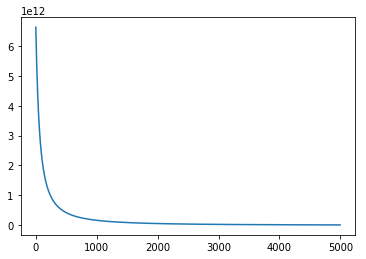

In [3]:
%%time
init = tf.global_variables_initializer()

t = []

num_epochs = 5000

with tf.Session() as sess:
  sess.run(init)

  for i in range(num_epochs):
    sess.run(train)
    if i % 5 == 0:
      cE, cw, cz, csigma = sess.run([energy, w, z, sigma])
      print(cw,cz,csigma,cE)
      t.append(cE)

  w_inferred_map = sess.run(w)
  z_inferred_map = sess.run(z)
  sigma_inferred_map = sess.run(sigma)

x = range(1, num_epochs, 5)
plt.plot(x, t)


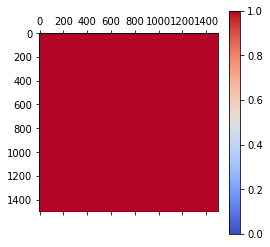

In [12]:
plt.matshow(np.abs(cosine_similarity(w_inferred_map,actual_w)),cmap='coolwarm',vmin=0,vmax=1)
plt.colorbar()

In [5]:
print("MAP-estimated axes:")
print(w_inferred_map)

def replace_latents(w, z, sigma):
    def interceptor(rv_constructor, *rv_args, **rv_kwargs):
        """Replaces the priors with actual values to generate samples from."""
        name = rv_kwargs.pop("name")
        if name == "w":
            rv_kwargs["value"] = w
        elif name == "z":
            rv_kwargs["value"] = z
        elif name == "sigma":
            rv_kwargs["value"] = sigma
        return rv_constructor(*rv_args, **rv_kwargs)
    return interceptor

with ed.interception(replace_latents(w_inferred_map, z_inferred_map, sigma_inferred_map)):
    generate = probabilistic_pca(
      n_features=n_features, n_sources=n_sources,
      n_observations=n_observations)

with tf.Session() as sess:
    x_generated, _ = sess.run(generate)

MAP-estimated axes:
[[ 1.2350162 ]
 [-0.55653334]
 [-0.6743661 ]
 ...
 [ 0.3137114 ]
 [ 0.20497568]
 [-0.27834988]]


In [6]:
w_inferred_map[:10,:10]

array([[ 1.2350162 ],
       [-0.55653334],
       [-0.6743661 ],
       [-0.66850406],
       [ 0.834293  ],
       [-0.5745504 ],
       [-1.077524  ],
       [ 0.692311  ],
       [ 1.0252036 ],
       [ 0.9666821 ]], dtype=float32)

In [7]:
actual_w[:10,:10]

array([[-0.06029509],
       [ 3.493209  ],
       [-0.9249408 ],
       [ 1.8947601 ],
       [-3.281358  ],
       [-1.0213972 ],
       [-1.4689684 ],
       [-0.01284182],
       [ 1.9062823 ],
       [-0.7436775 ]], dtype=float32)

In [8]:
actual_z.var(1)

array([0.9913836], dtype=float32)

In [9]:
z_inferred_map.var(1)

array([0.00589093], dtype=float32)

In [10]:
sigma_inferred_map

0.022787731

In [11]:
actual_sigma

0.0075553097